In [ ]:
# magic function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import io
import warnings
warnings.filterwarnings(action = "ignore",category=FutureWarning)
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, r2_score
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)
pd.set_option('display.expand_frame_repr',True)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# reading through colab session
# dataset = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# dataset.head()
# dataset.shape

In [ ]:
df = load_boston()
dataset = pd.DataFrame(df.data)

In [ ]:
dataset.columns = df.feature_names

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.target.shape

(506,)

In [ ]:
dataset['Price'] = df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
x.head()
y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

**Linear Regression**
neg_mean_squared_error will give negative MSE, value which is more closer to 0 will give better regression line but need to make sure it dont overfitt

In [ ]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,x,y,scoring="neg_mean_squared_error",cv=5)
mse
mean_mse = np.mean(mse)
print(' ')
print(f"mean of all cross val score is {mean_mse}")

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

 
mean of all cross val score is -37.131807467699055


In [ ]:
lin_regressor.fit(x,y)

LinearRegression()

Ridge Regression

In [ ]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_
ridge_regressor.best_score_ # best_score gives the Mean Absolute Error

{'alpha': 100}

-29.905701947540344

Lasso Regression

In [ ]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.764e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.210e+03, tolerance: 2.814e+00

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_
lasso_regressor.best_score_ # best_score gives the Mean Absolute Error

{'alpha': 1}

-35.531580220694856

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Prediction

In [ ]:
prediction_linear = lin_regressor.predict(x_test)
prediction_lasso = lasso_regressor.predict(x_test)
prediction_ridge = ridge_regressor.predict(x_test)

prediction_linear
prediction_lasso 
prediction_ridge


array([24.25249073, 24.94331333, 29.68652768, 12.97948781, 21.26198266,
       19.29748321, 21.32536104, 21.42939305, 18.54266897, 19.79013684,
        6.14779852, 16.96071981, 17.68344618,  6.12842196, 40.55765844,
       31.91054611, 23.46878866, 36.12770079, 30.72209056, 23.10891142,
       24.88682244, 24.29082812, 20.75049026, 30.35192656, 22.09669817,
       10.83162324, 17.67103669, 17.28601894, 35.78159518, 20.71548315,
       19.20496304, 18.51247609, 19.86184428, 23.74262478, 29.07194308,
       20.23150811, 11.88145871, 25.9998091 , 18.15955693, 16.1114628 ,
       25.81783237, 20.42320032, 21.59260894, 16.39147632, 22.04734975,
       25.02556238, 19.53928758, 22.36600228,  8.72822362, 24.58022019,
       20.10375923, 16.88541964, 24.48449227, 29.94563374, 13.25645238,
       20.90652153, 19.98446605, 14.78359641, 15.22308298, 22.39251096,
       16.88063827, 21.32529039, 32.79887232, 31.23411512, 18.58838397,
       32.41199147, 19.41291095, 18.99949651, 19.85268454, 22.69

array([23.74549008, 25.05669894, 27.30699681, 15.26474466, 20.28388223,
       22.75172373, 21.45598059, 24.23856649, 21.11819135, 19.95909495,
        8.98313974, 13.30218316, 17.99925624,  8.39272295, 35.35448484,
       30.78862119, 22.38396018, 34.3159854 , 29.8521009 , 24.63915134,
       25.7851669 , 25.20997813, 20.07312698, 29.34704456, 23.54801802,
       17.49320154, 19.76581421, 22.02254005, 31.35043449, 19.53061141,
       17.86731915, 20.03959005, 22.70589322, 24.27507125, 28.3321545 ,
       20.26286175, 10.68729818, 24.94704305, 15.84336797, 12.8254677 ,
       25.41186454, 20.63647768, 22.05355817, 16.77749717, 23.30629191,
       25.77681736, 19.84379805, 23.32853181, 12.22570134, 23.7054699 ,
       21.09270778, 16.76593695, 24.7895207 , 27.77843148, 15.02615536,
       21.29343807, 21.55732101, 17.59916216, 18.35971801, 19.53427781,
       21.69584327, 22.09466825, 30.77701755, 30.58126341, 18.59617266,
       31.00696923, 18.55257582, 18.71479862, 15.79040727, 22.86

array([23.96675946, 24.98996014, 27.5915891 , 14.26059397, 19.63842944,
       21.33417836, 21.32039718, 23.27239931, 20.30837677, 19.48226179,
        6.4578138 , 14.28838187, 18.59820449,  7.32675586, 36.99591747,
       31.36360797, 22.27052891, 35.16096521, 30.99397818, 24.25137539,
       25.40646048, 24.34913685, 20.21632652, 30.0992825 , 22.68378433,
       13.94885033, 18.64684143, 21.48729544, 33.26170271, 19.79217513,
       18.17155893, 19.9695722 , 20.42970393, 23.50528313, 28.90147149,
       20.77821424, 11.23603614, 25.21197341, 16.33605596, 13.74459083,
       24.96162953, 20.32082943, 21.56714797, 16.00431973, 22.631114  ,
       24.95003631, 18.4770964 , 24.0302334 , 12.20742324, 24.00507962,
       21.73290773, 17.56687132, 24.74921266, 28.65328508, 13.58721717,
       21.3260628 , 20.50282091, 15.43442841, 15.56550274, 19.58519135,
       18.94927305, 21.87657392, 31.86147714, 31.60936099, 18.30851646,
       31.83190056, 19.49024654, 18.37266891, 17.08246064, 22.88

In [ ]:
final_result = {'linear':[prediction_linear],
                'lasso':[prediction_lasso],
                'ridge':[prediction_ridge]}

In [ ]:
final_result = pd.DataFrame(final_result)
final_result

,linear,lasso,ridge
0,"[24.25249073493127, 24.943313325144278, 29.686...","[23.745490084009518, 25.056698941270135, 27.30...","[23.966759461667085, 24.989960144503897, 27.59..."


Plotting Distribution

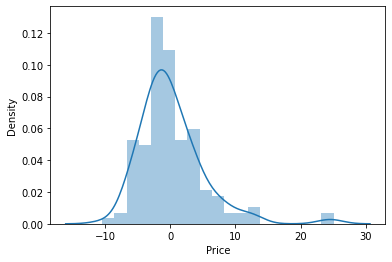

In [ ]:
# Linear Regression
sns.distplot(y_test-prediction_linear)

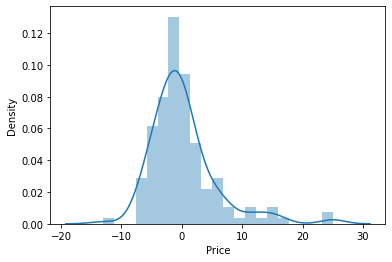

In [ ]:
# Lasso 
sns.distplot(y_test-prediction_lasso)

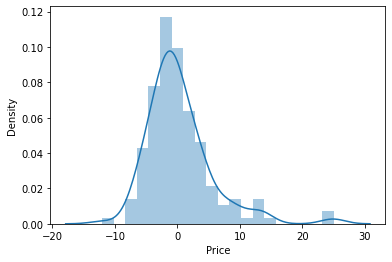

In [ ]:
# Ridge
sns.distplot(y_test-prediction_ridge)

**Comparing R2 Score of models**

In [ ]:
# Linear Regression
r_squared = lin_regressor.score(x, y)
r_squared

0.7406426641094095

In [53]:
# parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor_r2 = GridSearchCV(lasso,parameters,scoring="r2",cv=5)
lasso_regressor_r2.fit(x,y)
print(' ')
lasso_regressor_r2.best_params_ 
lasso_regressor_r2.best_score_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.764e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.210e+03, tolerance: 2.814e+00

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

{'alpha': 1}

0.431848787926522

In [ ]:
# prediction on train_set
lasso_r2 = Lasso(alpha=1)
lasso_r2.fit(x_train,y_train)
y_train_pred = lasso_r2.predict(x_train)

Lasso(alpha=1)

In [ ]:
# Evaluating on training and test data 
from sklearn import metrics
print(f"r2 score on training data {metrics.r2_score(y_train,y_train_pred)}")

# # Evaluating on test data 
y_test_pred = lasso_r2.predict(x_test)
print(f"r2 score on training data {metrics.r2_score(y_test,y_test_pred)}")

r2 score on training data 0.7084095500978868
r2 score on training data 0.6115433359595555


R2 score on Ridge

In [54]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor_r2 = GridSearchCV(ridge,parameters,scoring="r2",cv=5)
ridge_regressor_r2.fit(x_train,y_train)
print(' ')
ridge_regressor_r2.best_params_ 
ridge_regressor_r2.best_score_ 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

{'alpha': 0.01}

0.7183572707059698

In [56]:
# prediction on train_set
ridge_r2 = Ridge(alpha=0.01)
ridge_r2.fit(x_train,y_train)


Ridge(alpha=0.01)

In [57]:
# Evaluating on training set
from sklearn import metrics
y_train_pred_ridge = ridge_r2.predict(x_train)
print(f"r2 score on training data {metrics.r2_score(y_train,y_train_pred_ridge)}")

# # Evaluating on test data 
y_test_pred_ridge = ridge_r2.predict(x_test)
print(f"r2 score on training data {metrics.r2_score(y_test,y_test_pred)}")

r2 score on training data 0.764544269790751
r2 score on training data 0.6115433359595555
